# Identifikasi Hate Speech Berdasarkan Panjang Kata di Sosial Media Twitter

## BAB I Problem Definition

### Latar Belakang

Berdasarkan [data_indonesia](https://dataindonesia.id/digital/detail/pengguna-media-sosial-di-indonesia-sebanyak-167-juta-pada-2023) terdapat 167 juta pengguna aktif sosial media di Indonesia pada Januari 2023. Jumlah tersebut mewakili 60 persen dari jumlah penduduk Indonesia. Salah satu platform sosial media yang digunakan oleh masyarakat Indonesia adalah Twitter. Menurut [Idea](https://ejournal.unisba.ac.id/index.php/idea/article/view/4935#:~:text=Twitter%20merupakan%20jenis%20media%20sosial,dan%20memublikasikan%20aktivitas%20serta%20pendapatnya.)Twitter merupakan jenis media sosial microblogging yang memungkinkan pengguna nya untuk mempublikasikan aktivitas dan pendapatnya. Maka dari itu, pengguna sosial media twitter dapat mengutarakan pendapatnya melalui tulisan terhadap suatu kejadian. Namun, dibalik kebebasan ini terdapat suatu permasalahan yaitu hate speech. Menurut [un](https://www.un.org/en/hate-speech/understanding-hate-speech/what-is-hate-speech) hate speech dapat didefinisikan sebagai suatu wacana yang bersifat ofensif yang ditujukan kepada seseorang atau kelompok tertentu. Berdasarkan data dari [kominfo](https://www.kominfo.go.id/content/detail/34136/siaran-pers-no-143hmkominfo042021-tentang-sejak-2018-kominfo-tangani-3640-ujaran-kebencian-berbasis-sara-di-ruang-digital/0/siaran_pers) sejak tahun 2018, kominfo telah menangani kasus hatespeech sebanyak 3.640 kasus berbasis SARA (Suku, Agama, Ras, Antar Golongan).

Berdasarkan uraian diatas, penelitian ini bertujuan untuk menganalisis pengaruh panjang karakter dan kata terhadap jenis sentimen di sosial media Twitter.

### Tujuan Penelitian

Tujuan dari penelitian ini adalah mengamati pengaruh panjang karakter dan kata terhadap jenis sentimen negatif atau hate speech di sosial media Twitter.

### Rumusan Masalah

- Berapa jumlah kata dan karakter yang sering muncul dalam sentimen negatif di sosial media twitter?
- Berapa presentase sentimen negatif terhadap semua sentimen di sosial media Twitter?
- Kata apa yang sering muncul dalam sentimen negatif di sosial media twitter?
- Kategori hatespeech yang sering muncul

### Sumber Data

Sumber data pada penelitian ini didapat dari [kaggle](https://www.kaggle.com/datasets/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text) yang telah di preprocess dengan menghilangkan newline, retweet, user, url, dan ekstra spasi. Data tersebut dipreproces dengan tujuan untuk pembuatan sebuah API. Namun, terdapat perbedaan antara data yang di preproces untuk pembuatan API dan analisis data. Data yang ditujukan untuk pembuatan API telah di preprocess dengan mengganti kata kasar menjadi 'disensor' dengan tujuan untuk menutupi kata kasar saat pengguna memasukan suatu data, sedangkan data untuk analisis tidak dilakukan tahap sensor. Data yang digunakan terdiri dari 13 kolom. Tiga kolom pertama berisi mengenai tweet dengan tipe data string, HS dengan tipe data boolean dengan ketentuan 1 jika termasuk hate speech dan 0 ketika tidak termasuk hate speech, dan abusive dengan tipe data boolean dengan ketentuan 1 jika termasuk abusive dan 0 jika tidak termasuk abusive.

## BAB II Data Preparation


### Tahap Pertama

Tahap pertama yang dilakukan untuk menyiapkan data adalah mengimport framework yang hendak digunakan, pada penelitian ini framework yang hendak digunakan untuk menganalisis data adalah pandas.

In [1]:
import pandas as pd


### Tahap kedua

Tahap kedua yang dilakukan untuk menyiapkan data adalah mengimport data yang hendak digunakan. Pada penelitian ini, data yang digunakan bersumber dari [Kaggle](https://www.kaggle.com/datasets/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text).

In [2]:
df_data = pd.read_csv("Asset Challenge/data.csv",encoding = 'latin1')
df_alay = pd.read_csv("Asset Challenge/new_kamusalay.csv",encoding = 'latin1',header=None)
df_alay = df_alay.rename(columns={0:"Asli",1:"Baku"})

### Tahap Ketiga

Tahap ketiga yang dilakukan untuk menyiapkan data adalah melakukan pemeriksaan pada data. Hal yang diperiksa pada data antara lain adalah : 
- Apakah terdapat duplicate pada data yang digunakan?
- Apakah terdapat NaN pada data?

In [3]:
df_data.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [4]:
df_alay.isna().sum()

Asli    0
Baku    0
dtype: int64

In [5]:
df_data.duplicated().sum()

125

In [6]:
df_alay.duplicated().sum()

0

Berdasarkan hasil pemeriksaan duplicated pada data. Pada data df_data terdapat 125 data yang terduplikasi. Maka dari itu, duplikasi harus dihilangkan pada data dengan menggunakan drop_duplicates()

In [7]:
df_data = df_data.drop_duplicates()

In [8]:
df_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_data.duplicated().sum()

0

### Tahap Keempat

Tahap keempat yang dilakukan adalah melakukan pemrosesan data dengan cara mengubah semua huruf menjadi huruf kecil, menghilangkan char yang bersifat non alfa numeric, kata rt, kata user, menghilangkan url, dan menghilangkan ekstra spasi. Setelah itu, dilakukan substitusi antara kata-kata tidak efektif menjadi kata efektif yang tertera pada data df_alay

In [10]:
import re
alay_dict=pd.read_csv("Asset Challenge/new_kamusalay.csv",encoding='latin1',header=None)
alay_dict=alay_dict.rename(columns={0:'Original',1:'Baku'})
alay_dict_map = dict(zip(alay_dict['Original'], alay_dict['Baku']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])
def preprocess(TextYangInginDiPreProcess):

    """
    #Pada fungsi ini, kata-kata alay yang digunakan sebagai referensi adalah kata-kata alay pada
    data "new_kamusalay.csv"
    #Pada fungsi ini, kata kasar yang digunakan sebagai referensi adalah kata-kata kasar pada data
    abusive.csv
    """
    #Tahap Pertama Adalah Membuat semua huruf menjadi huruf kecil atau lower
    text = TextYangInginDiPreProcess.lower()

    #Tahap Kedua adalah menghilangkan non alpha numeric character pada text
    text = re.sub('[^0-9a-zA-Z]+',' ',text)

    #Tahap Ketiga adalah menghilangkan char tidak penting
    text=re.sub('\n',' ',text) #Menghilangkan new line pada data
    text=re.sub('rt',' ',text) #Menghilangkan kata-kata retweet 
    text=re.sub('user',' ',text) #Menghilangkan kata-kata user
    text=re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) #Menghilangkan  URL
    text=re.sub(' +',' ',text) #Menghilangkan ekstra spasi

    #Tahap keempat adalah membuat map terhadap kata-kata "alay" dan mengubah nya menjadi kata yang baku
    text=normalize_alay(text)

    return text

In [11]:
df_data['Tweet']=df_data['Tweet'].apply(preprocess)

In [12]:
df_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal berbicara ndasmu congor kamu yang...,1,1,1,0,0,0,1,0,0,1,0,0
13165,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0
13166,hati hati bisu tidak dan lagi bosan duh xf0 x...,0,0,0,0,0,0,0,0,0,0,0,0
13167,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0


## BAB III Analyze

### Mencari Kata apa yang sering muncul dalam sentimen negatif di sosial media twitter?

In [13]:
!pip3 install nltk

You should consider upgrading via the '/Volumes/Kerja_Keras/Folder_Fold_Recovery/For Learning/Bootcamp Binar/GoldChallange_Binar/gold_binar/bin/python3 -m pip install --upgrade pip' command.


In [14]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raihanekaputra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
filter_df_data_1=df_data[(df_data['HS'] == 1) & (df_data['Abusive'] == 1)]
filter_df_data_1

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak dan kawan kawan xf0 x9f x98 x8...,1,1,0,1,0,0,0,0,1,0,1,0
10,setidaknya gue punya jari tengah buat kamu seb...,1,1,1,0,0,0,0,0,1,1,0,0
11,banci kaleng malu tidak bisa jawab pe anyaan ...,1,1,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13155,makannya gue suruh baca anggaran pendapatan d...,1,1,1,0,0,0,0,0,1,1,0,0
13161,berengsek itu orang terbuat dari apa bikin gue...,1,1,1,0,0,0,0,0,1,1,0,0
13162,kepala kepolisian daerah babi biadab dan bodoh...,1,1,0,1,0,0,0,0,1,0,1,0
13164,jangan asal berbicara ndasmu congor kamu yang...,1,1,1,0,0,0,1,0,0,1,0,0


In [16]:
filter_df_data_2=df_data[(df_data['HS'] == 0) & (df_data['Abusive'] == 1)]
filter_df_data_2

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
7,gue baru saja selesai re watch aldnoah zero pa...,0,1,0,0,0,0,0,0,0,0,0,0
9,enak lagi kalau sambil ngewe,0,1,0,0,0,0,0,0,0,0,0,0
17,ari sama beki adalah rapi monyet xf0 x9f x98 x...,0,1,0,0,0,0,0,0,0,0,0,0
20,anjing ya tapi gue jarang mengambek takut wkwk...,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13103,rupanya ditanggapi lain oleh pihak mesjid san...,0,1,0,0,0,0,0,0,0,0,0,0
13104,teman makan teman itu ketika ujian dia tidak ...,0,1,0,0,0,0,0,0,0,0,0,0
13112,kunyuk memang dia wkwk,0,1,0,0,0,0,0,0,0,0,0,0
13143,wkwk cacat ah,0,1,0,0,0,0,0,0,0,0,0,0


In [17]:
filter_df_data_3=df_data[(df_data['HS'] == 1) & (df_data['Abusive'] == 0)]
filter_df_data_3

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13,aktor huru hara 98 prabowo si ingin lengserkan...,1,0,1,0,0,0,0,0,1,1,0,0
28,partai komunis indonesia hanya muncul jika je...,1,0,0,1,0,1,0,0,0,0,1,0
30,islam nusantara produk jil dipasarkan dengan ...,1,0,0,1,1,0,0,0,0,0,1,0
52,pinokio umur 3 tahunan itu 2019 ganti presiden,1,0,1,0,0,0,0,0,1,1,0,0
54,benci sekali dengan umat islam,1,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,mengomongnya begini nyatanya meminta 2 periode...,1,0,1,0,0,0,0,0,1,1,0,0
13125,selamat datang rezim komunis anti islam,1,0,1,0,1,1,0,0,0,1,0,0
13130,ruhut sitompul prabowo jangan omong doang unif...,1,0,1,0,0,0,0,0,1,1,0,0
13142,bubarkan dewan perwakilan rakyat bubarkan dewa...,1,0,0,1,0,0,0,0,1,0,0,1


In [18]:
filter_df_data_4=df_data[(df_data['HS'] == 0) & (df_data['Abusive'] == 0)]
filter_df_data_4

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
6,deklarasi pilihan kepala daerah 2018 aman dan ...,0,0,0,0,0,0,0,0,0,0,0,0
8,nah admin belanja satu lagi po terbaik nak mak...,0,0,0,0,0,0,0,0,0,0,0,0
12,kalau belajar ekonomi mestinya jago memprivati...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,ada 2 buku aktivitas angry burung the film yan...,0,0,0,0,0,0,0,0,0,0,0,0
13160,nostalgia dengan budaya nos tal gia dan kerin...,0,0,0,0,0,0,0,0,0,0,0,0
13163,orang yahudi kristen dan muslim yang belum per...,0,0,0,0,0,0,0,0,0,0,0,0
13166,hati hati bisu tidak dan lagi bosan duh xf0 x...,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
all_token_0_0=[] #HS==0 AB==0
all_token_1_1=[] #HS==1 AB==1
all_token_0_1=[] #HS==0 AB==1

for index, row in filter_df_data_4.iterrows():
    teks = row['Tweet']
    tokens = nltk.word_tokenize(teks.lower())
    tokens = [token for token in tokens if token.isalpha()]
    all_token_0_0 += tokens

for index, row in filter_df_data_1.iterrows():
    teks = row['Tweet']
    tokens = nltk.word_tokenize(teks.lower())
    tokens = [token for token in tokens if token.isalpha()]
    all_token_1_1 += tokens

for index, row in filter_df_data_2.iterrows():
    teks = row['Tweet']
    tokens = nltk.word_tokenize(teks.lower())
    tokens = [token for token in tokens if token.isalpha()]
    all_token_0_1 += tokens

In [20]:
freq = Counter(all_token_0_0)

In [21]:
freq

Counter({'kadang': 34,
         'aku': 560,
         'berpikir': 15,
         'kenapa': 128,
         'tetap': 141,
         'percaya': 62,
         'pada': 306,
         'tuhan': 70,
         'padahal': 72,
         'selalu': 126,
         'jatuh': 24,
         'berkali': 3,
         'kali': 96,
         'merasa': 55,
         'itu': 1061,
         'meninggalkan': 20,
         'sendirian': 5,
         'ketika': 47,
         'orang': 751,
         'tuaku': 1,
         'berencana': 3,
         'berpisah': 1,
         'kakakku': 1,
         'lebih': 263,
         'memilih': 65,
         'jadi': 527,
         'kristen': 341,
         'anak': 174,
         'ter': 6,
         'dan': 2968,
         'ku': 62,
         'tau': 150,
         'matamu': 4,
         'sipit': 160,
         'tapi': 386,
         'dilihat': 9,
         'dari': 602,
         'mana': 152,
         'deklarasi': 42,
         'pilihan': 303,
         'kepala': 328,
         'daerah': 421,
         'aman': 66,
         'ant

In [22]:
freq_1=Counter(all_token_1_1)


In [23]:
freq_1

Counter({'di': 543,
         'saat': 14,
         'semua': 113,
         'cowok': 18,
         'berusaha': 2,
         'melacak': 1,
         'perhatian': 2,
         'gue': 351,
         'kamu': 1085,
         'lantas': 3,
         'remehkan': 2,
         'yang': 959,
         'kasih': 42,
         'khusus': 16,
         'ke': 124,
         'basic': 1,
         'bego': 96,
         'kaum': 82,
         'cebong': 522,
         'kafir': 232,
         'sudah': 368,
         'kelihatan': 39,
         'dongoknya': 1,
         'dari': 199,
         'awal': 17,
         'tambah': 17,
         'dungu': 178,
         'lagi': 159,
         'haha': 124,
         'ya': 346,
         'bani': 134,
         'taplak': 7,
         'dan': 869,
         'kawan': 4,
         'setidaknya': 2,
         'punya': 88,
         'jari': 1,
         'tengah': 9,
         'buat': 93,
         'sebelum': 22,
         'ukur': 1,
         'nyali': 3,
         'sama': 335,
         'bacot': 108,
         'banci': 88,

In [24]:
freq_2=Counter(all_token_0_1)

In [25]:
freq_2

Counter({'siapa': 32,
         'yang': 447,
         'telat': 4,
         'memberi': 9,
         'tau': 53,
         'kamu': 256,
         'edan': 49,
         'sarap': 41,
         'gue': 389,
         'bergaul': 2,
         'dengan': 35,
         'cigax': 1,
         'jifla': 1,
         'calis': 1,
         'sama': 168,
         'itu': 208,
         'licew': 1,
         'juga': 94,
         'baru': 53,
         'saja': 157,
         'selesai': 9,
         're': 1,
         'watch': 1,
         'aldnoah': 1,
         'zero': 1,
         'paling': 13,
         'kampret': 37,
         'memang': 70,
         'akhirnya': 7,
         'karakter': 2,
         'utama': 1,
         'cowoknya': 4,
         'kena': 14,
         'friendzone': 1,
         'bro': 14,
         'xd': 2,
         'uniform': 195,
         'resource': 195,
         'locator': 195,
         'enak': 42,
         'lagi': 134,
         'kalau': 168,
         'sambil': 14,
         'ngewe': 64,
         'ari': 3,
         '

In [26]:
len(freq)

14244

In [27]:
len(freq_1)

7133

In [28]:
res=[]
for kata_kata in all_token_1_1:
    if kata_kata not in all_token_0_0:
        res.append(kata_kata)
        
for kata_kata in all_token_1_1:
    if kata_kata not in all_token_0_1:
        res.append(kata_kata)

In [29]:
freq_3=Counter(res)

In [30]:
freq_3

Counter({'remehkan': 4,
         'basic': 1,
         'dongoknya': 2,
         'kaleng': 26,
         'nyungsep': 18,
         'intelek': 4,
         'kencing': 26,
         'ahlun': 2,
         'nar': 2,
         'gantle': 4,
         'delay': 2,
         'guardian': 2,
         'flat': 2,
         'shoes': 2,
         'dijutekin': 2,
         'bangsat': 130,
         'belinya': 4,
         'farhat': 4,
         'silvy': 24,
         'micin': 12,
         'meladeni': 7,
         'awaasss': 2,
         'kosakatanya': 2,
         'memicing': 2,
         'monyong': 14,
         'kesamping': 2,
         'kentut': 2,
         'ngeden': 2,
         'provokasi': 10,
         'lowo': 2,
         'mengomong': 8,
         'lengserkan': 26,
         'cocot': 50,
         'socket': 10,
         'layer': 10,
         'kampang': 38,
         'blaaa': 2,
         'tolol': 140,
         'bobrok': 12,
         'paya': 2,
         'woiii': 4,
         'kapling': 4,
         'setoran': 4,
         'haja

In [31]:
type(freq_3)

collections.Counter

In [32]:
urutkan_kata_kasar_dari_terbesar_hingga_terkecil = sorted(freq_3.items(),key=lambda x: x[1], reverse=True)

In [33]:
urutkan_kata_kasar_dari_terbesar_hingga_terkecil

[('tolol', 140),
 ('bani', 134),
 ('bangsat', 130),
 ('kacung', 122),
 ('biadab', 118),
 ('komunis', 88),
 ('rezim', 55),
 ('ulama', 55),
 ('congor', 51),
 ('cocot', 50),
 ('cabul', 50),
 ('kodok', 48),
 ('kecebong', 48),
 ('jongos', 48),
 ('mampus', 47),
 ('penista', 46),
 ('umat', 45),
 ('sontoloyo', 44),
 ('keparat', 43),
 ('kampang', 38),
 ('debat', 36),
 ('koar', 36),
 ('hoaks', 34),
 ('anies', 33),
 ('muhammad', 32),
 ('kitab', 31),
 ('suci', 30),
 ('kacrut', 29),
 ('nabi', 29),
 ('pemilihan', 27),
 ('teroris', 27),
 ('kaleng', 26),
 ('kencing', 26),
 ('lengserkan', 26),
 ('ahoker', 26),
 ('geblek', 26),
 ('fitnah', 26),
 ('silvy', 24),
 ('matanajwadebatjaka', 24),
 ('tipu', 23),
 ('kesatuan', 23),
 ('keahlian', 22),
 ('pribumi', 22),
 ('menipu', 22),
 ('final', 21),
 ('myanmar', 20),
 ('pengecut', 20),
 ('kutil', 20),
 ('membiadabkan', 20),
 ('diktator', 20),
 ('gadungan', 20),
 ('al', 20),
 ('ngentot', 19),
 ('jancuk', 19),
 ('pemberantasan', 19),
 ('nusantara', 19),
 ('nyungse

In [34]:
import matplotlib.pyplot as plt

In [35]:
X = [item[0] for item in urutkan_kata_kasar_dari_terbesar_hingga_terkecil]
Y = [item[1] for item in urutkan_kata_kasar_dari_terbesar_hingga_terkecil]

Text(0.5, 1.0, '10 Kata Kasar Yang Sering Muncul')

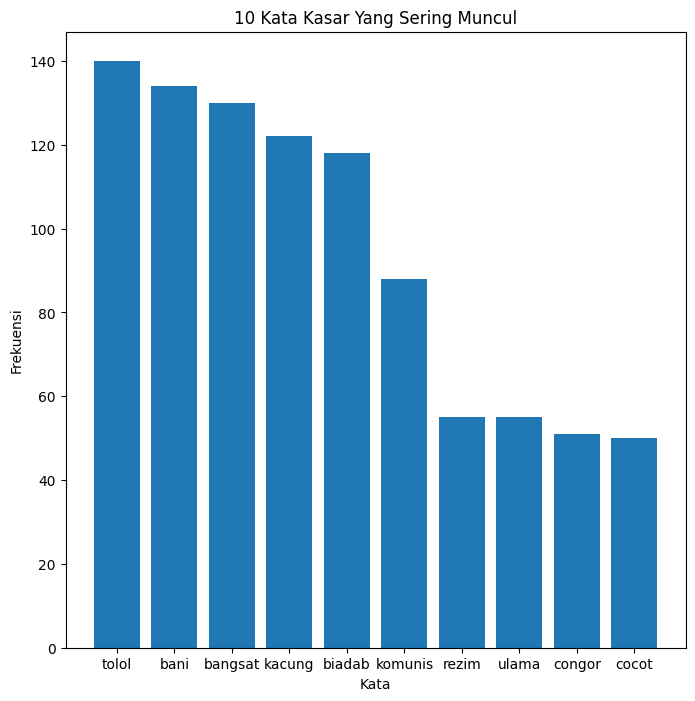

In [36]:
plt.figure(figsize=(8,8))
plt.bar(X[:10],Y[:10])
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('10 Kata Kasar Yang Sering Muncul')

Berdasarkan data yang telah diproses, didapatkan bahwa kata kasar dengan kemunculan tertinggi adalah "tolol".

### Mencari berapa jumlah kata dan karakter yang sering muncul dalam sentimen negatif di sosial media twitter?

In [37]:
df_data['Total_Karakter']=df_data['Tweet'].apply(len)

In [38]:
df_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_Karakter
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,135
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,109
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,251
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,68
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal berbicara ndasmu congor kamu yang...,1,1,1,0,0,0,1,0,0,1,0,0,66
13165,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,24
13166,hati hati bisu tidak dan lagi bosan duh xf0 x...,0,0,0,0,0,0,0,0,0,0,0,0,57
13167,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,116


In [39]:
df_data['Total_Kata']=df_data['Tweet'].apply(lambda x:len(x.split()))

In [40]:
df_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_Karakter,Total_Kata
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,135,22
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,109,19
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,251,39
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,68,14
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,78,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal berbicara ndasmu congor kamu yang...,1,1,1,0,0,0,1,0,0,1,0,0,66,10
13165,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,24,4
13166,hati hati bisu tidak dan lagi bosan duh xf0 x...,0,0,0,0,0,0,0,0,0,0,0,0,57,12
13167,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,116,18


### Mencari informasi mengenai panjang kata dan karakter yang digunakan pada tweet

In [41]:
data_asli = pd.read_csv("Asset Challenge/data.csv",encoding='latin1')

In [42]:
data_asli

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
data_asli['Panjang_char']=data_asli['Tweet'].apply(len)

In [44]:
data_asli['Panjang_char']

0        138
1        120
2        254
3         75
4         89
        ... 
13164     61
13165     28
13166     62
13167    135
13168     53
Name: Panjang_char, Length: 13169, dtype: int64

In [45]:
data_asli

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Panjang_char
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,61
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,28
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,62
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,135


In [46]:
data_ut = data_asli[['Tweet','HS','Panjang_char']]

In [47]:
data_ut

,Tweet,HS,Panjang_char
0,- disaat semua cowok berusaha melacak perhatia...,1,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,89
...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,61
13165,USER Kasur mana enak kunyuk',0,28
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,62
13167,USER USER USER USER Bom yang real mudah terdet...,0,135


In [48]:
data_ut_hs = data_ut[data_ut['HS']==1]

In [49]:
data_ut_hs['Panjang_char'].describe()

count    5561.000000
mean      102.168855
std        57.984596
min         6.000000
25%        58.000000
50%        94.000000
75%       131.000000
max       278.000000
Name: Panjang_char, dtype: float64

In [50]:
data_ut_nhs = data_ut[data_ut['HS']==0]
data_ut_nhs['Panjang_char'].describe()

count    7608.000000
mean      122.998817
std        74.958891
min         4.000000
25%        60.000000
50%       107.500000
75%       183.000000
max       561.000000
Name: Panjang_char, dtype: float64

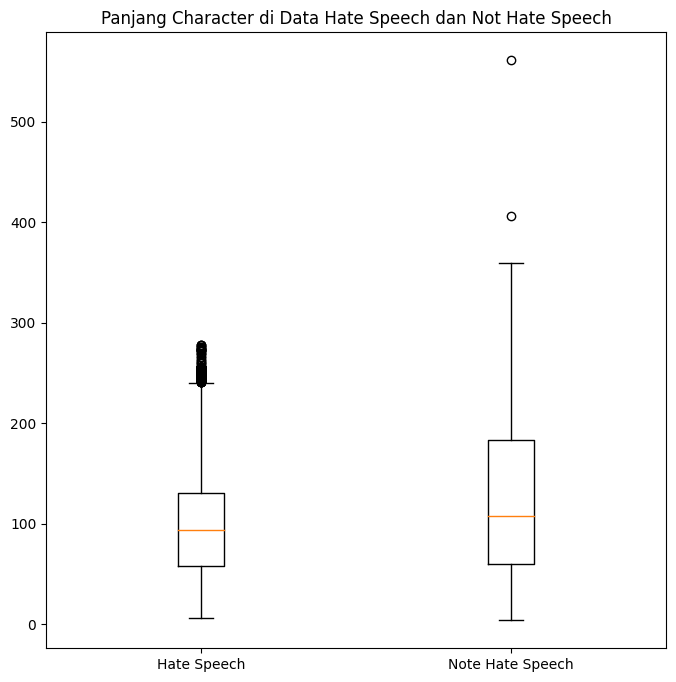

In [51]:
data_to_plot = [data_ut_hs['Panjang_char'],data_ut_nhs['Panjang_char']]
plt.figure(figsize=(8,8))
plt.boxplot(data_to_plot)
# Menampilkan legenda di sumbu x
plt.xticks([1, 2], ['Hate Speech', 'Note Hate Speech'])
# Menampilkan boxplot
plt.title("Panjang Character di Data Hate Speech dan Not Hate Speech")
plt.show()

In [52]:
# menghitung panjang kata
data_ut['Panjang_Kata']=data_ut['Tweet'].apply(lambda x: len(str(x).split()))

/var/folders/g9/y5ld4t7d2yd9217nzzy3h3pr0000gn/T/ipykernel_5396/1505447547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ut['Panjang_Kata']=data_ut['Tweet'].apply(lambda x: len(str(x).split()))


In [53]:
data_ut['Panjang_Kata']

0        25
1        21
2        37
3        14
4        14
         ..
13164    10
13165     5
13166     9
13167    22
13168    10
Name: Panjang_Kata, Length: 13169, dtype: int64

In [54]:
data_ut

,Tweet,HS,Panjang_char,Panjang_Kata
0,- disaat semua cowok berusaha melacak perhatia...,1,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,89,14
...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,61,10
13165,USER Kasur mana enak kunyuk',0,28,5
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,62,9
13167,USER USER USER USER Bom yang real mudah terdet...,0,135,22


In [55]:
data_ut_pk_hs = data_ut[data_ut['HS']==1]

In [56]:
data_ut_pk_hs

,Tweet,HS,Panjang_char,Panjang_Kata
0,- disaat semua cowok berusaha melacak perhatia...,1,138,25
4,USER USER Kaum cebong kapir udah keliatan dong...,1,89,14
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,73,6
10,"Setidaknya gw punya jari tengah buat lu, sebel...",1,94,15
11,USER USER USER USER BANCI KALENG MALU GA BISA ...,1,110,20
...,...,...,...,...
13157,"USER Pak Recep..............anda salah, itu gu...",1,141,20
13161,brengsek itu orang terbuat dr apa bikin gue be...,1,63,11
13162,Kapolda Babi! Biadap dan Bodoh! Gak punya otak...,1,52,9
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,61,10


In [57]:
data_ut_pk_hs['Panjang_Kata'].describe()

count    5561.000000
mean       15.734760
std         8.823385
min         1.000000
25%         9.000000
50%        14.000000
75%        20.000000
max        51.000000
Name: Panjang_Kata, dtype: float64

In [58]:
data_ut_pk_nhs=data_ut[data_ut['HS']==0]
data_ut_pk_nhs

,Tweet,HS,Panjang_char,Panjang_Kata
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,75,14
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,64,11
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,129,20
...,...,...,...,...
13160,[NOSTALGIA DENGAN BUDAYA]; ; nosÂ·talÂ·gia n k...,0,258,36
13163,"Orang Yahudi, Kristen dan Muslim yang belum pe...",0,236,33
13165,USER Kasur mana enak kunyuk',0,28,5
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,62,9


In [59]:
data_ut_pk_nhs['Panjang_Kata'].describe()

count    7608.000000
mean       18.413118
std        11.013434
min         1.000000
25%         9.000000
50%        16.000000
75%        26.000000
max        52.000000
Name: Panjang_Kata, dtype: float64

In [60]:
data_to_plot_2 =[data_ut_pk_hs['Panjang_Kata'],data_ut_pk_nhs['Panjang_Kata']]

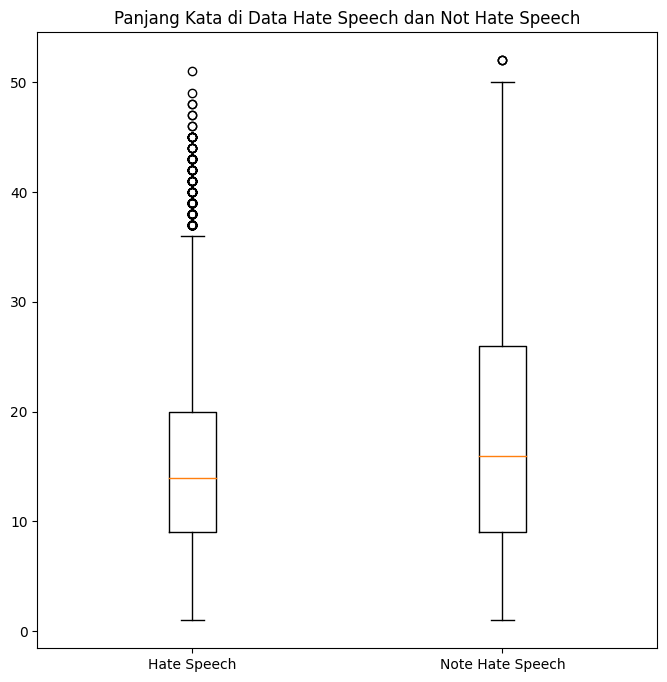

In [61]:
plt.figure(figsize=(8,8))
plt.boxplot(data_to_plot_2)
# Menampilkan legenda di sumbu x
plt.xticks([1, 2], ['Hate Speech', 'Note Hate Speech'])
# Menampilkan boxplot
plt.title("Panjang Kata di Data Hate Speech dan Not Hate Speech")
plt.show()

### Berapa Presentase Sentimen Negatif Terhadap Semua Sentimen di Sosial Media Twitter

In [62]:
df_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_Karakter,Total_Kata
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,135,22
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,109,19
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,251,39
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,68,14
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,78,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal berbicara ndasmu congor kamu yang...,1,1,1,0,0,0,1,0,0,1,0,0,66,10
13165,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,24,4
13166,hati hati bisu tidak dan lagi bosan duh xf0 x...,0,0,0,0,0,0,0,0,0,0,0,0,57,12
13167,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,116,18


In [65]:
sentimen_negatif = df_data[df_data['HS']==1]['HS']

In [67]:
sentimen_negatif.shape[0]

5518

In [68]:
df_data.shape[0]

13044

In [70]:
sentimen_positif = df_data[df_data['HS']==0]['HS']
sentimen_positif.shape[0]

7526

([<matplotlib.patches.Wedge at 0x12b5a0400>,
 [Text(0.26340550729142853, 1.0679969750558966, 'Sentimen_Negatif'),
  Text(-0.26340540729833395, -1.0679969997176955, 'Sentimen_Positif')],
 [Text(0.14367573124987007, 0.5825438045759436, '42.3%'),
  Text(-0.14367567670818215, -0.5825438180278338, '57.7%')])

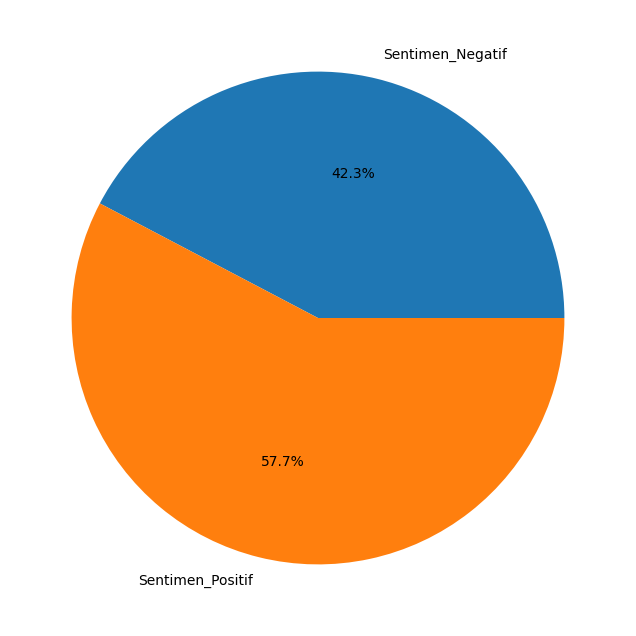

In [73]:
kategori = ['Sentimen_Negatif','Sentimen_Positif']
presentase = [sentimen_negatif.shape[0],sentimen_positif.shape[0]]

plt.figure(figsize=(8,8))
plt.pie(presentase, labels=kategori, autopct='%1.1f%%')

### Kategori Hatespeech Yang Sering Muncul

In [77]:
jenis_hs = df_data[['HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other']]
jenis_hs

,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other
0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
13164,1,0,0,0,1,0,0
13165,0,0,0,0,0,0,0
13166,0,0,0,0,0,0,0
13167,0,0,0,0,0,0,0


In [79]:
jumlah_hate_speech = jenis_hs.sum()
jumlah_hate_speech

HS_Individual    3540
HS_Group         1978
HS_Religion       789
HS_Race           563
HS_Physical       322
HS_Gender         304
HS_Other         3706
dtype: int64

Text(0.5, 1.0, 'Jumlah Hatespeech Yang Muncul')

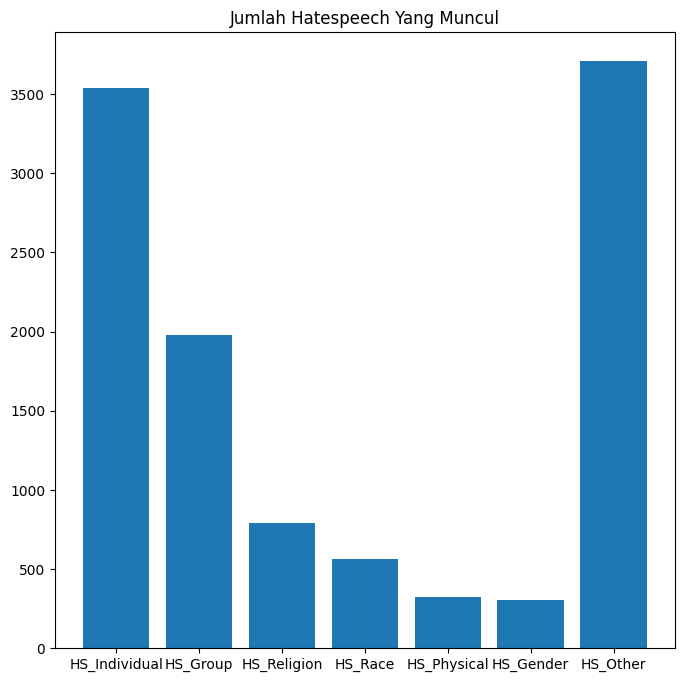

In [81]:
plt.figure(figsize=(8,8))
plt.bar(jumlah_hate_speech.index,jumlah_hate_speech.values)
plt.title("Jumlah Hatespeech Yang Muncul")